In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

In [3]:
ucl

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,53,2,5,0,0,0,0,861,10,0
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,32,8,15,0,0,0,2,994,13,2
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,51,3,3,0,0,0,0,840,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,Kevin,Forward,22,Brazil,Shakhtar Donetsk,Premier Liga,League_phase,E,12.0,...,17,7,0,0,0,0,0,460,7,1
206,207,Cabella,Midfielder,35,France,Lille,Ligue 1,Round16,C,3.0,...,13,3,4,0,0,0,0,388,7,3
207,208,Locatelli,Midfielder,27,Italy,Juventus,Serie A,Knockout_phase,D,35.0,...,51,19,17,0,0,0,0,673,9,1
208,209,Palacios,Midfielder,26,Argentina,Bayer Leverkusen,Bundesliga,Round16,C,40.0,...,48,10,13,0,0,0,0,666,10,0


In [4]:
ucl['Team'] = ucl['Team'].str.strip()

In [5]:
ucl[['Age','Total_attempts','Passes_completed','Chances_Created']].describe()

,Age,Total_attempts,Passes_completed,Chances_Created
count,210.000000,210.000000,210.000000,210.000000
mean,26.780952,12.661905,364.223810,10.123810
std,4.416110,11.322374,216.590771,7.911224
min,17.000000,0.000000,47.000000,0.000000
25%,24.000000,5.000000,209.250000,4.000000
50%,26.000000,10.000000,319.000000,9.000000
75%,29.750000,18.000000,450.000000,15.000000
max,39.000000,64.000000,1308.000000,39.000000


<Axes: xlabel='count', ylabel='Position'>

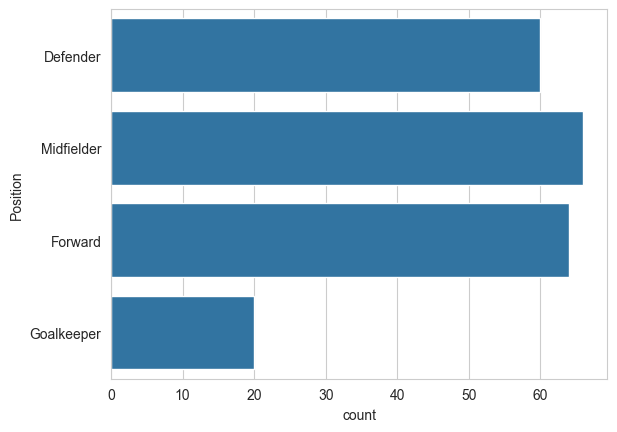

In [6]:
sns.countplot(ucl.Position)

In [7]:
bestplayer = ucl[ucl['MOTM_Awards'] > 2]

In [8]:
bestplayer.value_counts()

PlayerID  Player            Position    Age  Nationality  Team             Competitions  Phase            Phase_Tier  Value10^6  Jersey_Num  Rating  Goals  Assists  TopSpeed(km/h)  DistanceCovered(km)  Total_attempts  Dribbles  Passes_completed  Chances_Created  Balls_recovered  Tackles_Won  Tackles_Lost  Saves  Goals_Conceded  Clean_Sheets  MOTM_Awards  Minutes_played  Match_played  DNP
4         Raphinha          Forward     28   Brazil       Barcelona        La Liga       Semi_finals      A           80.0       11          8.31    13     9        34.7            126.8                52              24        433               39               18               2            7             0      0               0             3            1225            14            0      1
38        Vinicius Jr       Forward     24   Brazil       Real Madrid      La Liga       Quarter_finals   B           200.0      7           7.79    8      3        35.5            118.9                42         

In [9]:
young_age_old = ucl.Age.min(), ucl.Age.max()

In [10]:
print(young_age_old)

(np.int64(17), np.int64(39))


In [11]:
ucl.groupby("Player").mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001330C0D8260>>

In [12]:
values_stats = ucl['Value10^6'].describe()

values_stats

count    210.000000
mean      39.684524
std       36.107141
min        0.750000
25%       16.250000
50%       30.000000
75%       50.000000
max      200.000000
Name: Value10^6, dtype: float64

In [13]:
barcelona_players = ucl[ucl['Team'] == 'Barcelona']


In [14]:
barcelona_players

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
15,16,Yamal,Forward,17,Spain,Barcelona,La Liga,Semi_finals,A,180.0,...,19,5,5,0,0,0,1,1101,13,1
40,41,Kounde,Defender,26,France,Barcelona,La Liga,Semi_finals,A,60.0,...,56,8,5,0,0,0,0,1106,13,1
56,57,Pedri,Midfielder,22,Spain,Barcelona,La Liga,Semi_finals,A,80.0,...,52,3,4,0,0,0,2,1117,14,0
89,90,Inigo Martinez,Defender,33,Spain,Barcelona,La Liga,Semi_finals,A,5.0,...,50,4,8,0,0,0,1,958,11,3
111,112,Dani Olmo,Midfielder,27,Spain,Barcelona,La Liga,Semi_finals,A,60.0,...,16,2,2,0,0,0,0,440,9,5
141,142,Balde,Defender,21,Spain,Barcelona,La Liga,Semi_finals,A,60.0,...,31,6,3,0,0,0,0,804,10,4
147,148,Casado,Midfielder,21,Spain,Barcelona,La Liga,Semi_finals,A,30.0,...,40,20,15,0,0,0,0,631,10,4
162,163,Szczesny,Goalkeeper,35,Poland,Barcelona,La Liga,Semi_finals,A,1.0,...,0,0,0,28,17,2,0,750,8,6


In [15]:
fig = px.histogram(ucl,x='Age',nbins=12,title='Age distribution of players in the Champions League')

fig.update_layout(
    bargap=0.1,
    xaxis_title='Age',
    yaxis_title='Numbers of Players'
)

fig.show()

In [16]:
def age_group(age):
    if age <= 20:
        return '17 & 20'
    elif 20 < age <= 25:
        return '20 & 25'
    elif 25 < age <= 30:
        return '25 & 32'
    else:
        return '32'


In [17]:
ucl_group_age = ucl['Age'].apply(age_group)

In [18]:
age_group_counts = ucl_group_age.value_counts().reset_index()

In [19]:
age_group_counts.columns = ['Age Group', 'Count']

# Pie chart
fig = px.pie(
    age_group_counts,
    names='Age Group',
    values='Count',
    title='Total Players by Age Groups',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [20]:
team_counts = ucl['Team'].value_counts()

team_counts

Team
Inter               13
Barcelona           12
Arsenal FC          12
Paris SG            12
Real Madrid         11
BVB Dortmund        11
PSV Eindhoven       10
Bayern Munich       10
Liverpool FC        10
Benfica              9
Atalanta BC          9
Aston Villa          8
Atletico Madrid      8
Bayer Leverkusen     7
Milan                7
Monaco               7
Manchester City      7
Celtic               6
Lille                6
Sporting CP          6
Club Brugge          5
Juventus             5
Feyenoord            4
Bologna              4
Shakhtar Donetsk     3
Brest                2
VfB Stuttgart        2
Sturm Graz           1
Leipzig              1
Dinamo Zagreb        1
Girona               1
Name: count, dtype: int64

In [21]:
team_counts = ucl['Team'].value_counts()
valid_teams = team_counts[team_counts >= 8].index

# Create a new DataFrame with exactly 8 players from each valid team
winner_team_probabilities = ucl[ucl['Team'].isin(valid_teams)].groupby('Team').head(8)

# Now you can do value_counts() on the balanced dataset
balanced_team_counts = winner_team_probabilities['Team'].value_counts()


In [22]:
balanced_team_counts

Team
Inter              8
Barcelona          8
Liverpool FC       8
Real Madrid        8
Arsenal FC         8
Benfica            8
Atletico Madrid    8
Paris SG           8
PSV Eindhoven      8
BVB Dortmund       8
Aston Villa        8
Atalanta BC        8
Bayern Munich      8
Name: count, dtype: int64

In [23]:
winner_team_probabilities = (
    ucl[ucl['Team'].isin(valid_teams)]
    .sort_values(by='Value10^6', ascending=False)
    .groupby('Team')
    .head(8)
    .groupby('Team')['Value10^6']
    .sum()
    .sort_values(ascending=False)
)

winner_team_probabilities

Team
Real Madrid        945.0
Arsenal FC         740.0
Barcelona          600.0
Bayern Munich      522.0
Liverpool FC       505.0
Inter              503.0
Paris SG           490.0
Aston Villa        281.0
Atletico Madrid    260.0
BVB Dortmund       256.0
Atalanta BC        220.0
PSV Eindhoven      192.0
Benfica            163.0
Name: Value10^6, dtype: float64

In [24]:
180 + 45 + 180 + 200 + 30 + 80 + 100 + 130

945

In [25]:
top_dribblers = ucl.sort_values(by='Dribbles', ascending=False).head(20)

In [26]:
top_dribblers

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
15,16,Yamal,Forward,17,Spain,Barcelona,La Liga,Semi_finals,A,180.0,...,19,5,5,0,0,0,1,1101,13,1
37,38,Vinicius Jr,Forward,24,Brazil,Real Madrid,La Liga,Quarter_finals,B,200.0,...,20,3,11,0,0,0,3,1104,12,2
84,85,Rafael Leao,Forward,25,Portugal,Milan,Serie A,Knockout_phase,D,75.0,...,3,1,8,0,0,0,3,797,10,0
75,76,Dembele,Forward,27,France,Paris SG,Ligue 1,Final,S,75.0,...,14,1,5,0,0,0,2,1163,15,2
167,168,Jamal Musiala,Forward,22,Germany,Bayern Munich,Bundesliga,Quarter_finals,B,150.0,...,29,5,6,0,0,0,1,866,12,2
164,165,Gittens,Forward,20,England,BVB Dortmund,Bundesliga,Quarter_finals,B,50.0,...,21,1,3,0,0,0,1,848,14,0
82,83,Barcola,Forward,22,France,Paris SG,Ligue 1,Final,S,45.0,...,18,4,5,0,0,0,1,1096,17,0
188,189,Rogers,Midfielder,22,England,Aston Villa,Premier League,Quarter_finals,B,50.0,...,12,4,4,0,0,0,2,1025,12,0
93,94,Desire Doue,Forward,19,France,Paris SG,Ligue 1,Final,S,60.0,...,20,5,9,0,0,0,1,742,16,1
171,172,Olise,Forward,23,France,Bayern Munich,Bundesliga,Quarter_finals,B,58.0,...,24,3,11,0,0,0,1,1033,14,0


In [27]:
fig = px.bar(
    top_dribblers,
    x='Player',
    y='Dribbles',
    color='Dribbles',
    text='Dribbles',
    hover_name='Team',
    title='Top Dribblers Players in Champions League 2025 Season',

)

fig.update_traces(textposition='inside')
fig.update_layout(xaxis_tickangle=-50, uniformtext_minsize=10)

fig.show()

In [28]:
ucl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PlayerID             210 non-null    int64  
 1   Player               210 non-null    object 
 2   Position             210 non-null    object 
 3   Age                  210 non-null    int64  
 4   Nationality          210 non-null    object 
 5   Team                 210 non-null    object 
 6   Competitions         210 non-null    object 
 7   Phase                210 non-null    object 
 8   Phase_Tier           210 non-null    object 
 9   Value10^6            210 non-null    float64
 10  Jersey_Num           210 non-null    int64  
 11  Rating               210 non-null    float64
 12  Goals                210 non-null    int64  
 13  Assists              210 non-null    int64  
 14  TopSpeed(km/h)       210 non-null    float64
 15  DistanceCovered(km)  210 non-null    flo

In [29]:
fig_scatter = px.scatter(
    ucl,
    x="Goals",
    y="Assists",
    color="Position",
    title="Goals vs Assists by Player Position",
    labels={"Goals": "Goals Scored", "Assists": "Assists Made"},
    hover_data=["Player", "Team"]  # tregon emrin e lojtarit dhe skuadrën kur kalon me mouse
)
fig_scatter.show()

In [30]:
top_motm = ucl[['Player', 'Team', 'MOTM_Awards']].sort_values(by='MOTM_Awards', ascending=False).head(10)

In [31]:
top_motm

,Player,Team,MOTM_Awards
60,Lautaro Martinez,Inter,4
3,Raphinha,Barcelona,3
47,Griezmann,Atletico Madrid,3
37,Vinicius Jr,Real Madrid,3
41,Julian Alvarez,Atletico Madrid,3
55,Vitinha,Paris SG,3
144,Harry Kane,Bayern Munich,3
134,Guirassy,BVB Dortmund,3
84,Rafael Leao,Milan,3
12,Hakimi,Paris SG,2


#### Performanca sipas fazave të Champions League  Mesatare e Rating në çdo fazë

In [32]:
ucl.groupby('Phase')['Rating'].mean().sort_values(ascending=False)

Phase
Quarter_finals     7.487500
Final              7.322800
Semi_finals        7.312778
Round16            7.238103
Semi_finals        7.206667
Knockout_phase     7.164600
Quarter_finals     7.157857
League_phase       7.123846
Name: Rating, dtype: float64

<Axes: xlabel='Position', ylabel='DistanceCovered(km)'>

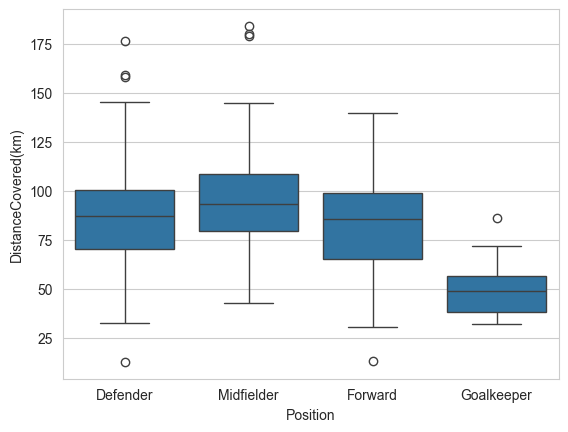

In [33]:
sns.boxplot(x='Position', y='DistanceCovered(km)', data=ucl)

In [34]:
fig = px.box(ucl, x='Position', y='DistanceCovered(km)', title='Boxplot of Distance Covered by Position',color='Position')
fig.show()

<Axes: xlabel='TopSpeed(km/h)', ylabel='Count'>

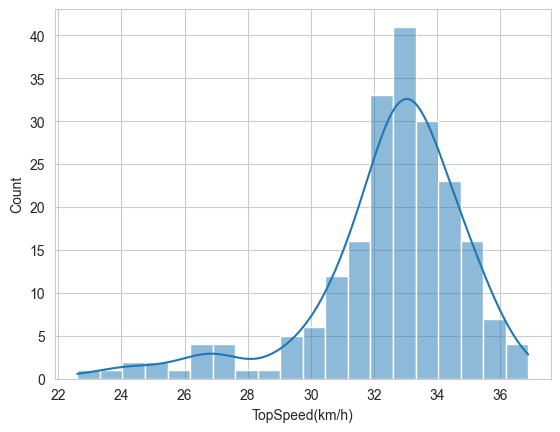

In [35]:
sns.histplot(ucl['TopSpeed(km/h)'], bins=20, kde=True)

In [36]:
fig = px.histogram(ucl, x='TopSpeed(km/h)', nbins=20, title='Histogram of Top Speed',color_discrete_sequence=['blue'])
fig.show()

#### Efektiviteti i lojtarëve

<Axes: xlabel='Minutes_played', ylabel='Goals'>

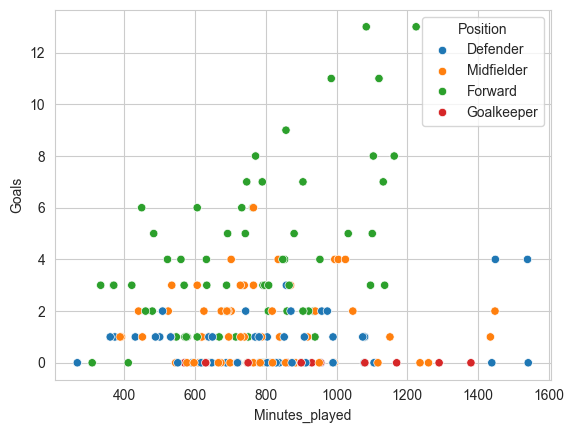

In [37]:
sns.scatterplot(x='Minutes_played', y='Goals', hue='Position', data=ucl)

In [38]:
px.scatter(ucl, x='Minutes_played', y='Goals', color='Position', title='Goals vs Minutes Played by Player Position', hover_data=['Player', 'Team'])

#### Lojtaret mem ndikim në ndeshje (MOTM)
##### Top 10 lojtaret me më shumë “Man of the Match” (MOTM_Awards)

In [39]:
top_motm = ucl[['Player', 'Team', 'MOTM_Awards','Goals']].sort_values(by='MOTM_Awards', ascending=False).head(10)

In [40]:
px.bar(top_motm, x='Player', y='Goals', color='MOTM_Awards', title='Top MOTM Awards Winners', text='Goals', hover_name='Team')

In [41]:
top_motm_rating = ucl[['Player', 'Team', 'MOTM_Awards','Rating']].sort_values(by='MOTM_Awards', ascending=False).head(10)

In [42]:
px.bar(top_motm_rating, x='Player', y='MOTM_Awards', color='Rating', title='Top MOTM Awards Winners', text='Rating', hover_name='Team')

In [43]:
names_nationality = list(dict(ucl['Nationality'].value_counts()).keys())[:15]

In [44]:
values_nationality = ucl['Nationality'].value_counts().tolist()[:15]

In [45]:
names_nationality

['France',
 'Netherlands',
 'Germany',
 'Spain',
 'Brazil',
 'Italy',
 'England',
 'Argentina',
 'Belgium',
 'Portugal',
 'Switzerland',
 'Turkey',
 'Norway',
 'Croatia',
 'Morocco']

In [46]:
values_nationality

[24, 18, 16, 16, 15, 11, 11, 10, 9, 9, 6, 5, 4, 4, 3]

In [47]:
fig = go.Bar(x = names_nationality,
            y = values_nationality,
            marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                         line=dict(color='rgb(0,0,1)',width=1.5)),
            text = names_nationality)

layout = go.Layout()
fig = go.Figure(data = fig, layout = layout)
fig.update_layout(title_text='Top 15 Nationalities of Players in Champions League 2025 Season')
fig.show()

In [48]:
ucl['Competitions'] = ucl['Competitions'].str.strip()

In [49]:
names_Competitions = list(dict(ucl['Competitions'].value_counts()).keys())
values_Competitions = ucl['Competitions'].value_counts().tolist()

In [50]:
names_Competitions

['Serie A',
 'Premier League',
 'La Liga',
 'Bundesliga',
 'Ligue 1',
 'Liga Portugal',
 'Eredivisie',
 'Premiership',
 'Pro League',
 'Premier Liga',
 'ABundesliga',
 'SuperSport HNL']

In [51]:
values_Competitions

[38, 37, 32, 31, 27, 15, 14, 6, 5, 3, 1, 1]

In [52]:
fig = go.Bar(x = names_Competitions,
             y = values_Competitions,
             marker = dict(color = 'rgba(0, 0, 255, 0.5)',
                         line=dict(color='rgb(0,0,50)',width=1.5)),
             )
layout = go.Layout()
fig = go.Figure(data = fig, layout = layout)
fig.update_layout(title_text='All competitions by number of players (210 players) in the 2025 Champions League season')
fig.show()

In [53]:
ucl_top_passes = ucl[['Player','Passes_completed','Team']].sort_values(by='Passes_completed', ascending=False).head(12)

In [54]:
px.bar(ucl_top_passes, x='Player', y='Passes_completed', color='Passes_completed', title='Top 12 Players by Passes Completed', text='Team', hover_name='Team')

In [55]:
serie_a_players = ucl[ucl['Competitions'] == 'Serie A']

In [56]:
top_serie_a_players_rating = serie_a_players[['Player', 'Team', 'Rating']].sort_values(by='Rating', ascending=False).head(15)

In [57]:
top_serie_a_players_rating[['Player','Team','Rating']].head(15)

,Player,Team,Rating
154,Lookman,Atalanta BC,7.69
36,Calhanoglu,Inter,7.51
186,Skorupski,Bologna,7.49
114,Zappacosta,Atalanta BC,7.45
49,Charles Ketelaere,Atalanta BC,7.43
60,Lautaro Martinez,Inter,7.42
207,Locatelli,Juventus,7.41
131,Dumfries,Inter,7.40
14,Pulisic,Milan,7.36
112,Yann Sommer,Inter,7.35


In [58]:
fig = px.bar(top_serie_a_players_rating, x='Player', y='Rating', color='Team', title='Top 15 Players by Rating in Serie A', hover_name='Team')
fig.show()

#### Mesataren e DistanceCovered(km) per lojtarët që kanë luajtur ne Serie A 🇮🇹 :

In [59]:
serie_a_players_mean = ucl[ucl['Competitions'] == 'Serie A']

In [60]:
average_distance = serie_a_players_mean['DistanceCovered(km)'].mean()

In [61]:
print(f"Mesatarja e DistanceCovered(km) për lojtarët ne Ucl Bazuar ne Serie A eshte: {average_distance:.2f} km")

Mesatarja e DistanceCovered(km) për lojtarët ne Ucl Bazuar ne Serie A eshte: 72.34 km


#### top 10 lojtaret me distancë me të madhe te mbuluar mesatarisht Bazuar ne Skuadrat Serie A(Italy) ne Champions League

In [62]:
distance_per_player_serie_a = serie_a_players.groupby(['Player', 'Team'])['DistanceCovered(km)'].mean().sort_values(ascending=False)

print(distance_per_player_serie_a.head(15))

Player             Team       
Marten de Roon     Atalanta BC    112.0
Tijjani Reijnders  Milan          111.3
Ederson            Atalanta BC    100.2
Theo Hernandez     Milan           99.8
Youssouf Fofana    Milan           98.2
Nicolo Barella     Inter           97.4
Zappacosta         Atalanta BC     90.1
Calhanoglu         Inter           87.6
Pulisic            Milan           87.3
Bastoni            Inter           85.5
Rafael Leao        Milan           84.9
Charles Ketelaere  Atalanta BC     84.5
Mkhitaryan         Inter           81.8
Thuram             Inter           81.6
Federico Gatti     Juventus        81.5
Name: DistanceCovered(km), dtype: float64


#### Mesataren e DistanceCovered(km) per lojtarët që kanë luajtur ne La Liga 🇪🇸 :

In [63]:
laliga_players_mean = ucl[ucl['Competitions'] == 'La Liga']

In [64]:
average_distance_laliga = laliga_players_mean['DistanceCovered(km)'].mean()

In [65]:
print(f"Mesatarja e DistanceCovered(km) për lojtarët ne Ucl Bazuar ne La Liga eshte: {average_distance_laliga:.2f} km")

Mesatarja e DistanceCovered(km) për lojtarët ne Ucl Bazuar ne La Liga eshte: 81.85 km


#### top 10 lojtaret me distancë me të madhe te mbuluar mesatarisht Bazuar ne Skuadrat La Liga (Spain)  ne Champions League

In [66]:
distance_per_player_laliga = laliga_players_mean.groupby(['Player', 'Team'])['DistanceCovered(km)'].mean().sort_values(ascending=False)

In [67]:
print(distance_per_player_laliga.head(15))

Player          Team           
Pedri           Barcelona          141.1
Valverde        Real Madrid        140.0
Raphinha        Barcelona          126.8
Vinicius Jr     Real Madrid        118.9
Kounde          Barcelona          113.2
Kylian Mbappe   Real Madrid        109.9
Rodrygo         Real Madrid        102.9
Inigo Martinez  Barcelona          101.7
Yamal           Barcelona          101.3
Tchouameni      Real Madrid         97.0
Julian Alvarez  Atletico Madrid     96.5
De Paul         Atletico Madrid     93.4
Lewandowski     Barcelona           92.5
Griezmann       Atletico Madrid     89.6
Balde           Barcelona           86.2
Name: DistanceCovered(km), dtype: float64


#### Top 10 Goalkeepers ne Champions League Bazuar ne Saves,Clean_Sheets,Goals_Conceded

In [68]:
goalkeepers = ucl[ucl['Position'] == 'Goalkeeper']
top_saves = goalkeepers.sort_values('Saves', ascending=False).head(10)

In [69]:
fig = px.scatter(
    top_saves,
    x='Saves',
    y='Clean_Sheets',
    size='Minutes_played',
    color='Player',
    size_max=25,
    hover_name='Team',
    title='Goalkeepers: Saves vs Clean Sheets'
)
fig.show()

In [70]:
goalkeepers['Gk_Level'] = (
    goalkeepers['Saves'] * 1.5 +
    goalkeepers['Clean_Sheets'] * 4 -
    goalkeepers['Goals_Conceded'] * 1.2
)

best_gks = goalkeepers.sort_values('Gk_Level', ascending=False).head(10)


C:\Users\arber\AppData\Local\Temp\ipykernel_25484\242791126.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
best_gks[['Player','Age', 'Team', 'Saves', 'Clean_Sheets', 'Goals_Conceded', 'Gk_Level']].head(10)

,Player,Age,Team,Saves,Clean_Sheets,Goals_Conceded,Gk_Level
112,Yann Sommer,36,Inter,54,7,16,89.8
160,Emiliano Martinez,30,Aston Villa,50,5,12,80.6
110,Donnarumma,26,Paris SG,39,6,14,65.7
58,David Raya,29,Arsenal FC,32,6,9,61.2
33,Courtois,32,Real Madrid,52,1,18,60.4
196,Schmeichel,38,Celtic,41,3,17,53.1
52,Alisson Becker,32,Liverpool FC,24,3,3,44.4
126,Riznyk,26,Shakhtar Donetsk,37,2,16,44.3
42,Mike Maignan,29,Milan,36,1,12,43.6
172,Mignolet,37,Club Brugge,36,3,19,43.2


In [72]:

fig = px.bar(
    best_gks[['Player', 'Gk_Level', 'Team']],
    x= 'Player',
    y='Gk_Level',
    color='Team',
    title='Best Goalkeepers in Champions League 2025',
    text='Gk_Level'
)
fig.show()

In [73]:
ucl[ucl['Player'] == 'Tillman']

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
155,156,Tillman,Midfielder,22,United States,PSV Eindhoven,Eredivisie,Round16,C,30.0,...,30,6,8,0,0,0,2,534,6,6


In [74]:
ucl[ucl['Player'] == 'Bastoni']


,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
165,166,Bastoni,Defender,26,Italy,Inter,Serie A,Final,S,80.0,...,61,15,13,0,0,0,1,1078,14,1


In [75]:
aggresive_players_scouting =  ucl[(ucl['Balls_recovered'] > 30) & (ucl['Tackles_Won'] > 12) & (ucl['Age']< 25)]

In [76]:
aggresive_players_scouting[['Player','Position','Age','Balls_recovered','Tackles_Won']]

,Player,Position,Age,Balls_recovered,Tackles_Won
43,Ryan Flamingo,Defender,22,49,16
97,Jurrien Timber,Defender,23,44,15
129,Nuno Mendes,Defender,22,87,23
147,Casado,Midfielder,21,40,20
175,Joao Neves,Midfielder,20,87,19


In [77]:
px.bar(aggresive_players_scouting, x='Player', y='Value10^6', color='Team',text='Age', title='Aggresive Players in Champions League 2025', hover_name='Team')

In [78]:
top_10_values  = ucl.nlargest(10, 'Value10^6')[['Player','Age','Team','Value10^6']].head(15)

In [79]:
top_10_values

,Player,Age,Team,Value10^6
37,Vinicius Jr,24,Real Madrid,200.0
5,Jude Bellingham,21,Real Madrid,180.0
15,Yamal,17,Barcelona,180.0
19,Kylian Mbappe,25,Real Madrid,180.0
178,Declan Rice,26,Arsenal FC,160.0
59,Phil Foden,24,Manchester City,150.0
88,Bukayo Saka,23,Arsenal FC,150.0
167,Jamal Musiala,22,Bayern Munich,150.0
181,Florian Wirtz,22,Bayer Leverkusen,140.0
198,Valverde,26,Real Madrid,130.0


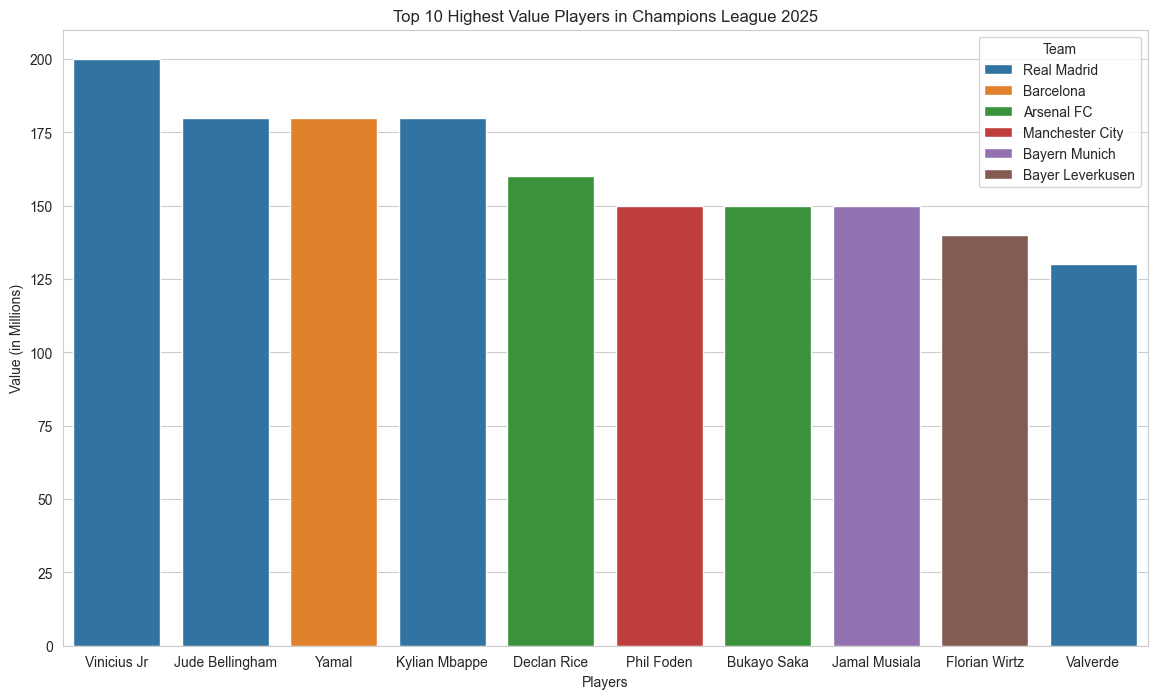

In [80]:
plt.figure(figsize=(14,8))
sns.barplot(x=top_10_values['Player'], y=top_10_values['Value10^6'], hue=top_10_values['Team'])
plt.title('Top 10 Highest Value Players in Champions League 2025')
plt.ylabel('Value (in Millions)')
plt.xlabel('Players')
plt.show()

#### Krijim i një raporti Goals per Attempt (gola për tentativë):

In [81]:
attempting_players = ucl[ucl['Total_attempts'] > 34]

attempting_players



,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
12,13,Hakimi,Defender,26,Morocco,Paris SG,Ligue 1,Final,S,60.0,...,74,11,15,0,0,0,2,1540,17,0
15,16,Yamal,Forward,17,Spain,Barcelona,La Liga,Semi_finals,A,180.0,...,19,5,5,0,0,0,1,1101,13,1
19,20,Kylian Mbappe,Forward,25,France,Real Madrid,La Liga,Quarter_finals,B,180.0,...,9,3,3,0,0,0,1,1132,14,0
37,38,Vinicius Jr,Forward,24,Brazil,Real Madrid,La Liga,Quarter_finals,B,200.0,...,20,3,11,0,0,0,3,1104,12,2
75,76,Dembele,Forward,27,France,Paris SG,Ligue 1,Final,S,75.0,...,14,1,5,0,0,0,2,1163,15,2
134,135,Guirassy,Forward,29,Nigeria,BVB Dortmund,Bundesliga,Quarter_finals,B,40.0,...,7,0,1,0,0,0,3,1084,14,0
144,145,Harry Kane,Forward,31,England,Bayern Munich,Bundesliga,Quarter_finals,B,90.0,...,10,2,6,0,0,0,3,1120,13,1
171,172,Olise,Forward,23,France,Bayern Munich,Bundesliga,Quarter_finals,B,58.0,...,24,3,11,0,0,0,1,1033,14,0
176,177,Haaland,Forward,24,Norway,Manchester City,Premier League,Knockout_phase,D,20.0,...,6,0,2,0,0,0,0,771,9,1


In [82]:
ucl['Goals_per_attempt'] = ucl['Goals'] / ucl['Total_attempts']

In [83]:
ucl[['Player','Age', 'Goals_per_attempt', 'Total_attempts', 'Goals']].sort_values(by='Goals', ascending=False).head(15)

,Player,Age,Goals_per_attempt,Total_attempts,Goals
3,Raphinha,28,0.250000,52,13
134,Guirassy,29,0.325000,40,13
144,Harry Kane,31,0.224490,49,11
2,Lewandowski,36,0.323529,34,11
60,Lautaro Martinez,27,0.391304,23,9
37,Vinicius Jr,24,0.190476,42,8
75,Dembele,27,0.125000,64,8
176,Haaland,24,0.210526,38,8
51,Pavlidis,26,0.225806,31,7
19,Kylian Mbappe,25,0.137255,51,7


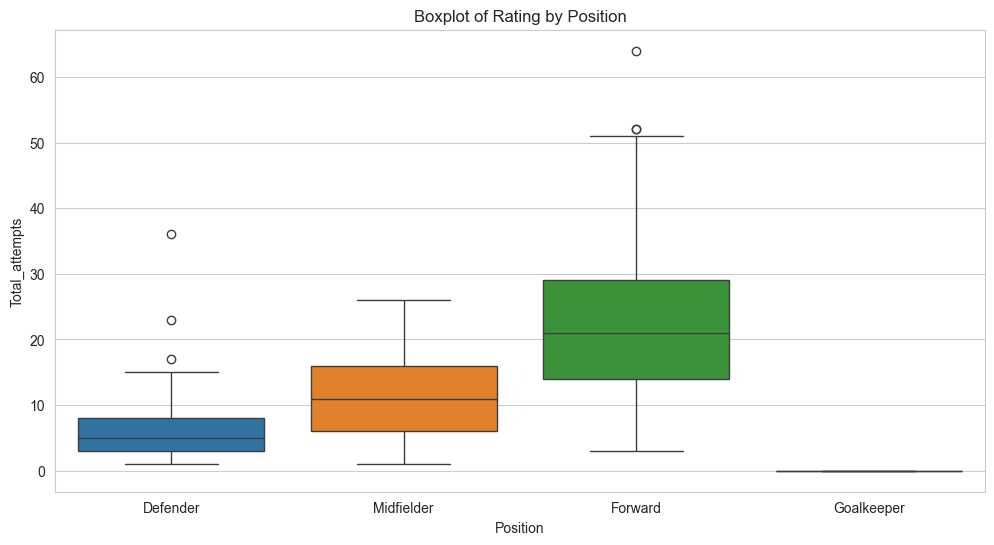

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Total_attempts', data=ucl, hue='Position')
plt.title('Boxplot of Rating by Position')
plt.xlabel('Position')
plt.ylabel('Total_attempts')
plt.show()

In [89]:
top10_value = ucl.sort_values('Value10^6', ascending=False).head(10)

fig2 = px.box(
    ucl,
    x='Position',
    y='Value10^6',
    color='Position',
    points='all',
    title='Shpërndarja e Vlerës së Tregut sipas Pozicionit',
    labels={'Value10^6': 'Value €', 'Position': 'Position⚽'}
)
fig2.update_layout(showlegend=False)
fig2.show()